# Mushroom Classification Using Different Classifiers
* Mushrooms are not just good to taste, but they have some medicinal properties as well. A research centre would like to explore the different types of mushrooms, to understand which of them are edible, and which are not, so that they could discover some of the hidden properties of mushrooms, which could possibly heal certain terminal illnesses.

# Problem Statement
**In this project, we will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.**

## Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import chi2, RFE

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, explained_variance_score, plot_confusion_matrix

from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [3]:
msh_data = pd.read_csv('mushrooms.csv')
msh_data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


## EDA 

### Data understanding & checking missing/null values

In [4]:
# Checking the size of dataset
msh_data.shape

(8124, 23)

In [5]:
#Summarizing the overall dataset
msh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#Checking the null values in dataset
msh_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
#Checking the duplicate values
msh_data.duplicated().sum()

0

In [8]:
#Statistical description of data
msh_data.describe(include='O')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
#Checking the unique values in each column
col = msh_data.columns

for i in col:
    uqv = msh_data[i].unique()
    print(i, ':', uqv,'\n')

class : ['p' 'e'] 

cap-shape : ['x' 'b' 's' 'f' 'k' 'c'] 

cap-surface : ['s' 'y' 'f' 'g'] 

cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] 

bruises : ['t' 'f'] 

odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] 

gill-attachment : ['f' 'a'] 

gill-spacing : ['c' 'w'] 

gill-size : ['n' 'b'] 

gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] 

stalk-shape : ['e' 't'] 

stalk-root : ['e' 'c' 'b' 'r' '?'] 

stalk-surface-above-ring : ['s' 'f' 'k' 'y'] 

stalk-surface-below-ring : ['s' 'f' 'y' 'k'] 

stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] 

stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] 

veil-type : ['p'] 

veil-color : ['w' 'n' 'o' 'y'] 

ring-number : ['o' 't' 'n'] 

ring-type : ['p' 'e' 'l' 'f' 'n'] 

spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b'] 

population : ['s' 'n' 'a' 'v' 'y' 'c'] 

habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l'] 



In [10]:
#Count of the unique values in each columns
col = msh_data.columns

for i in col:
    c_uqv = msh_data.value_counts(i)
    print(c_uqv,'\n' '\n')
    

class
e    4208
p    3916
dtype: int64 


cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
dtype: int64 


cap-surface
y    3244
s    2556
f    2320
g       4
dtype: int64 


cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
dtype: int64 


bruises
f    4748
t    3376
dtype: int64 


odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
dtype: int64 


gill-attachment
f    7914
a     210
dtype: int64 


gill-spacing
c    6812
w    1312
dtype: int64 


gill-size
b    5612
n    2512
dtype: int64 


gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
dtype: int64 


stalk-shape
t    4608
e    3516
dtype: int64 


stalk-root
b    3776
?    2480
e    1120
c     556
r     192
dtype: int64 


stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
dtype: int64 


stalk-surface-below-rin

#### From above analysis, we can say that there are no null values in dataset BUT for the column stalk-root there are missing values represented as '?'. 

**We cannot drop it, since it holds more than 30% of data. Let's, try to explore it further then try to impute (if necessary) or will remove entire column (if contribution found to be negligible).**

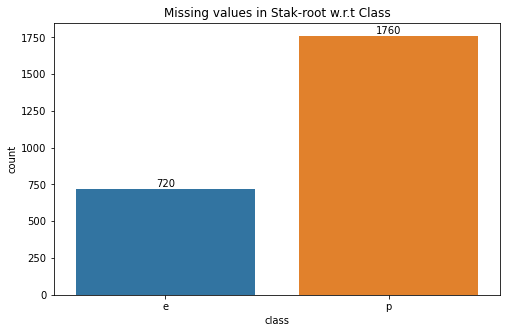

In [11]:
#Visualizing the missing values of stalk-root column
plt.figure(figsize=(8,5))
ax = sns.countplot(data = msh_data[msh_data['stalk-root']=='?'], x='class')
plt.title('Missing values in Stak-root w.r.t Class')
ax.bar_label(ax.containers[0])
plt.show()

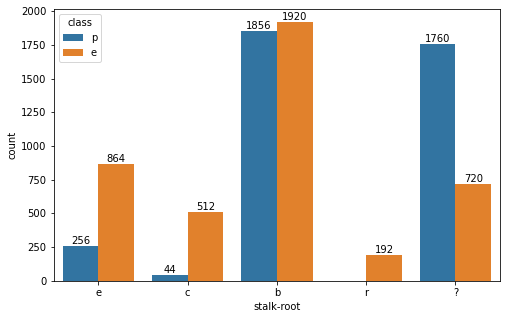

In [12]:
#Visualizing the missing values of stalk-root column
plt.figure(figsize=(8,5))
ax = sns.countplot(data = msh_data , x = 'stalk-root', hue = 'class')
for i in ax.containers:
    ax.bar_label(i,)

In [13]:
#Count of class column
msh_data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### From above analysis,
**We will impute the missing values with 'b' as the occurence of data is balanced w.r.t class.**  

In [14]:
# Filling missing values with 'b'
msh_data['stalk-root'] = msh_data['stalk-root'].replace('?',msh_data['stalk-root'].mode()[0])

In [15]:
#Re-Checking the missing value of stalk-root
msh_data['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [16]:
#Checking the veil-type column 
msh_data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [17]:
#Removing the column since its not helping to differentitate betweeen classes of mushrooms
msh_data.drop('veil-type', axis=1, inplace=True)

### Data Visualization & Drawing Inference

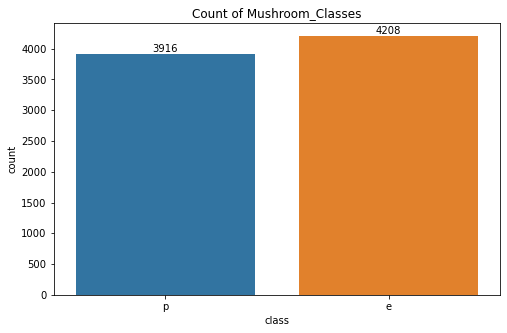

In [18]:
#Visualising the count of mushroom class
plt.figure(figsize=(8,5))
ax = sns.countplot(x = msh_data['class'])
plt.title('Count of Mushroom_Classes')
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, we can say that count of edible class mushroom is slightly higher than poisonous class. So, dataset is a balanced dataset.

#### Note:
* Kindly, also refer the word docx. simultaneously for further exploring visualisation in better way.
* The word docx. has the images of mushroom's below visualisation in detailed way. Hence, it will help making better understanding of data-visualisation  

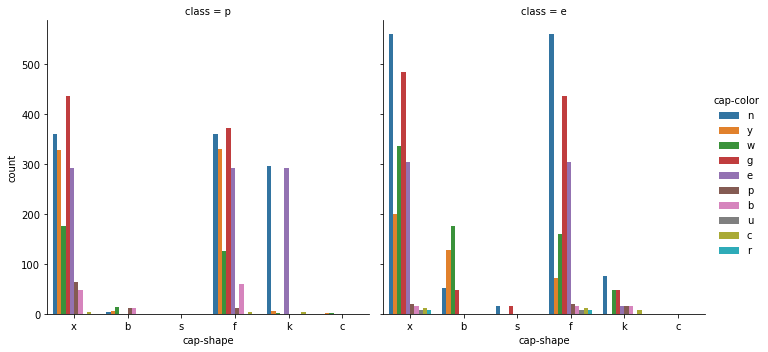

In [19]:
#Visualising a particular column among two classes 
sns.catplot(x='cap-shape', col='class', hue='cap-color', data=msh_data, kind='count')
plt.show()

#### From above visual, we can say that
* Red (e) or Brown (n) cap-coloured with knobbed (k) cap-shaped are poisonous mushrooms.

* Bell (b) cap-shaped with white (w) or yellow (y) cap-coloured are highly recommended for consumption.

* We have very less data for Sunken (s) & Conical (c) w.r.t cap-shaped mushrooms.

* We have very less data for cinnamon (c), green (r) & purple (u) w.r.t cap-coloured mushrooms.

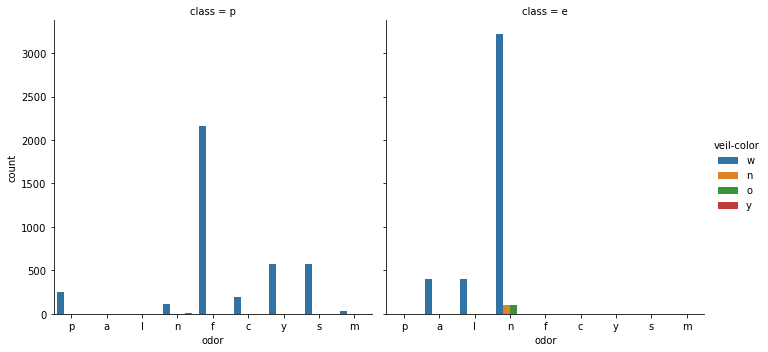

In [20]:
#Visualising a particular column among two classes 
sns.catplot(x='odor', col='class', hue='veil-color', data=msh_data, kind='count')
plt.show()

#### From above visual we can say that,

* Mushrooms with Foul (f), fishy (y) or pungent (p) odour with white coloured (w) veils are poisonous.

* Odourless (n) mushrooms with white (w) coloured veils are fit for consumption.

* We have very less data for brown (n), orange (o) & yellow (y) coloured veiled mushroom.

* Similarly, for musty (m) odoured mushrooms.  

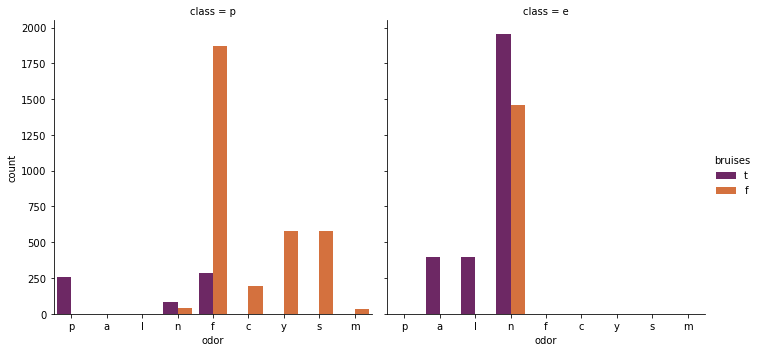

In [21]:
#Visualising a particular column among two classes 
sns.catplot(x='odor', col='class', hue='bruises', data=msh_data, palette='inferno', kind='count')
plt.show()

#### From above visual we can say that,

* Mushrooms with Foul (f), fishy (y) or pungent (p) odour with no (f) bruises are poisonous.

* Odourless (n), almond (a) or anise (l) with bruised (t) mushrooms are fit for consumption.


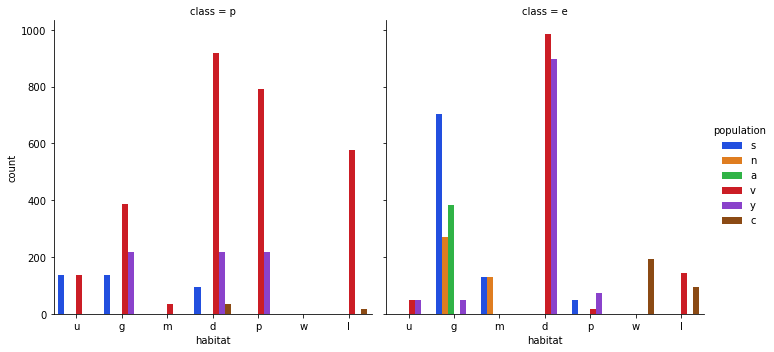

In [22]:
#Visualising a particular column among two classes 
sns.catplot(x='habitat', col='class', hue='population', data=msh_data, kind='count', palette='bright')
plt.show()


#### From above visual we can say that,

* Mushrooms grown in paths (p) or leaves (l) habitat with several (v) or in solitary (y) are found to be poisonous.

* Mushrooms grown in green (g) habitat with numerous (n) or abundant (a) population is highly recommended for eating.


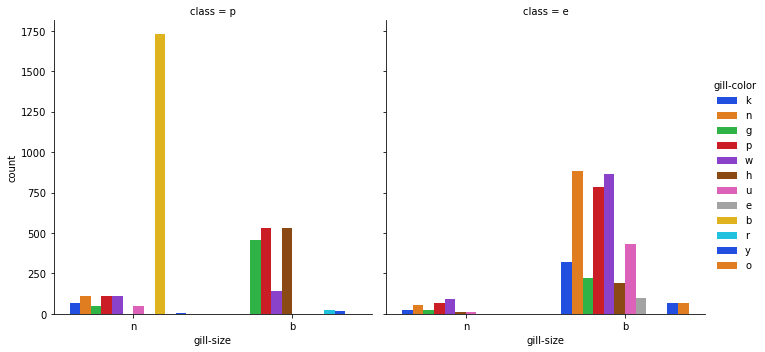

In [23]:
#Visualising a particular column among two classes 
sns.catplot(x='gill-size', col='class', hue='gill-color', data=msh_data, kind='count', palette='bright')
plt.show()

#### From above visual we can say that,

* Narrowed (n) gill with buff (b) coloured Mushrooms are found to be poisonous.

* Broaded (b) gill with brown (n) coloured Mushrooms found to be edible.

## Data Preprocessing

In [24]:
data = msh_data.copy()

### Label encoding

In [25]:
le = LabelEncoder()

mappings = []

for col in range(len(data.columns)):
    data[data.columns[col]] = le.fit_transform(data[data.columns[col]])
    mappings_dict = {index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [26]:
#Reference for original data for encoded value
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'},
 {0: 'd', 1: 'g

In [27]:
#Re-checking the dtype for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

### Data Visualisation for numerical data

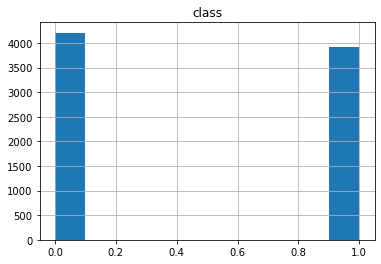

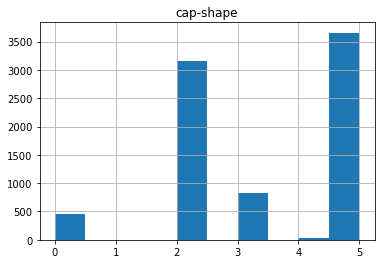

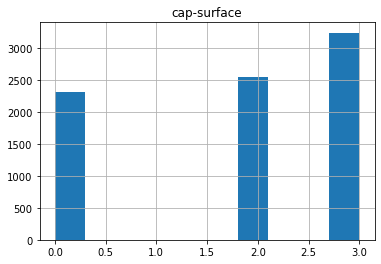

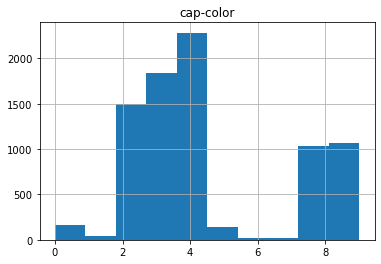

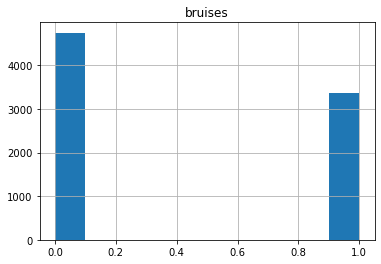

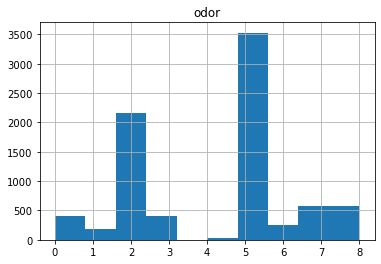

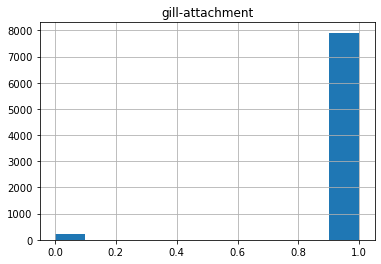

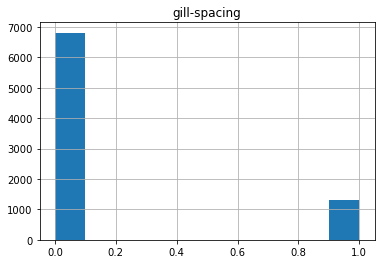

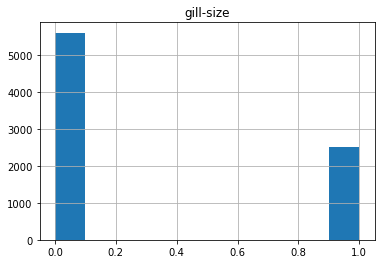

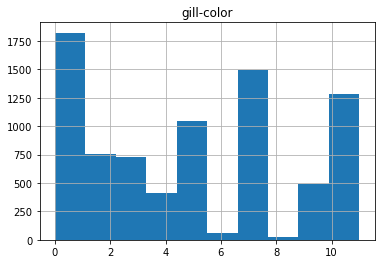

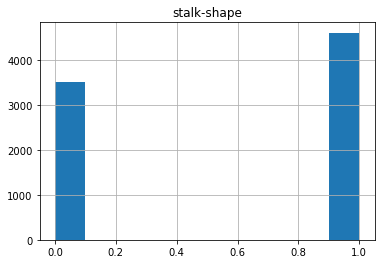

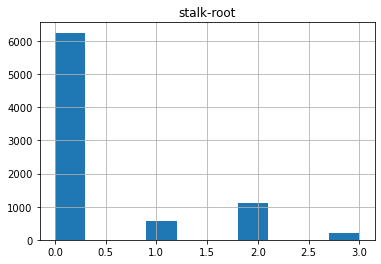

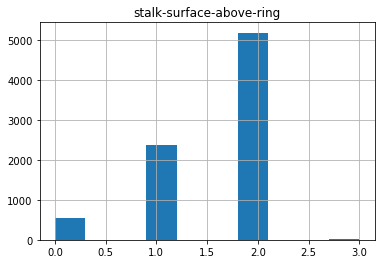

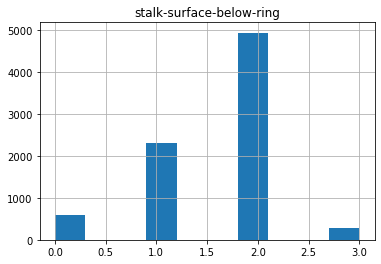

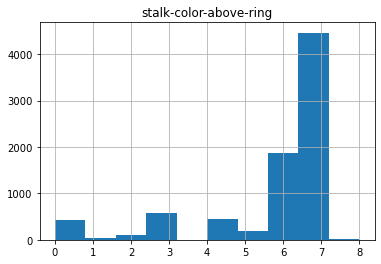

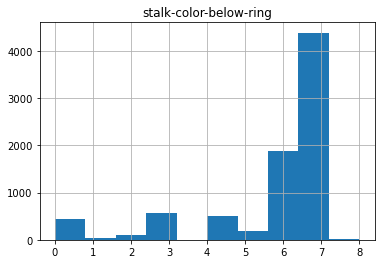

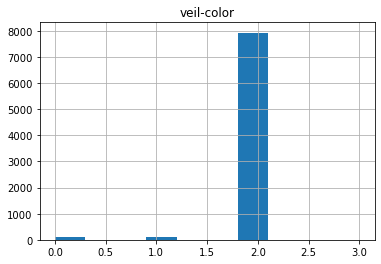

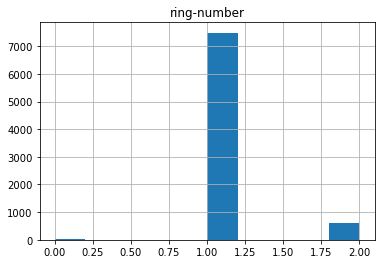

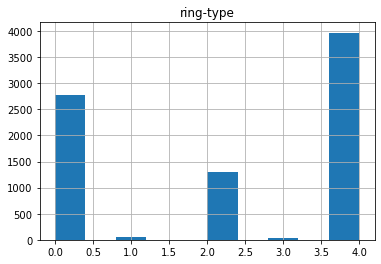

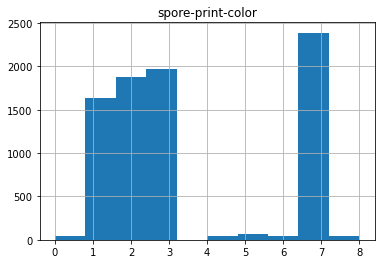

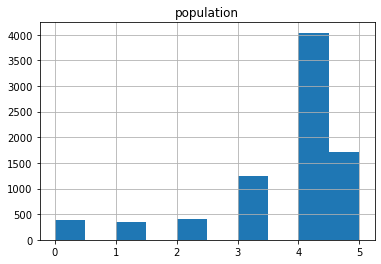

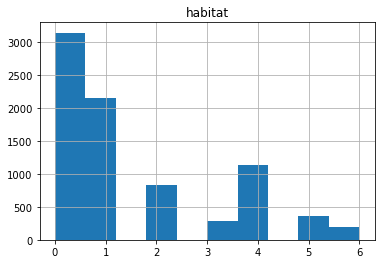

In [28]:
#Checking the distribution of data
col = data.columns
for i in col:
    data.hist(i)
    plt.title(i)
    plt.grid()
    plt.grid()  

#### From above visual,
* The distribution of data is not symmetrical.
* Most of the columns has less than 4 unique categorical data. 

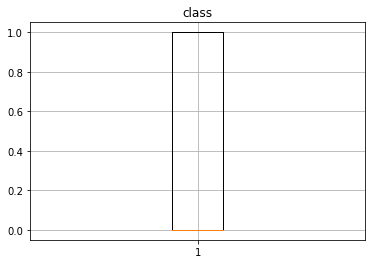

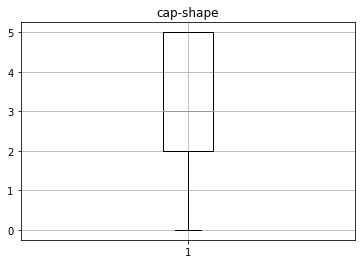

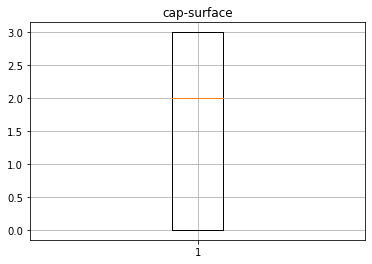

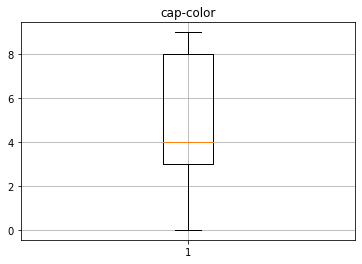

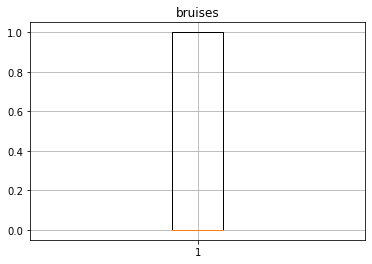

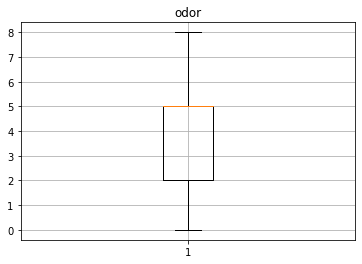

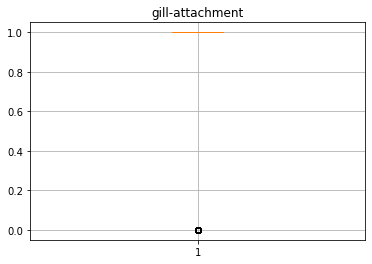

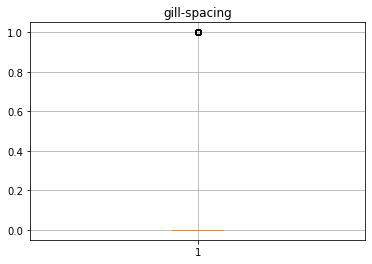

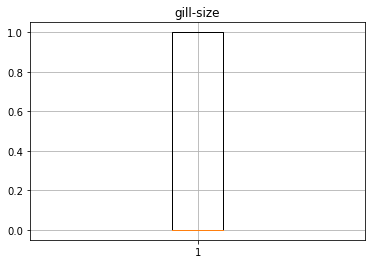

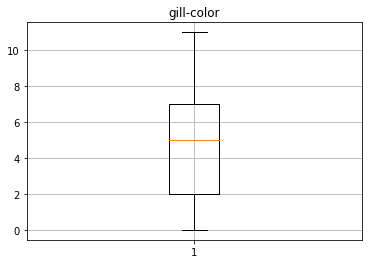

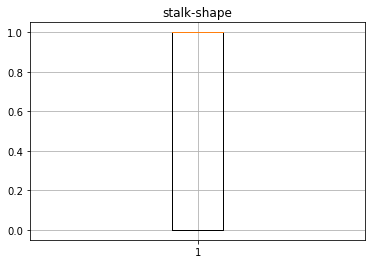

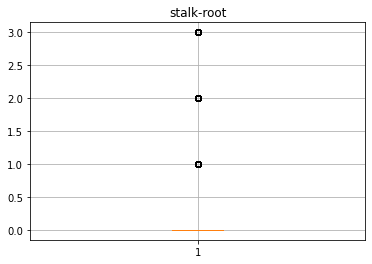

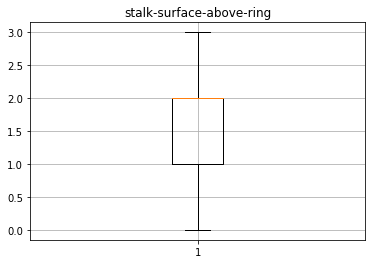

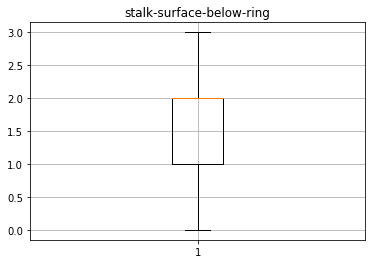

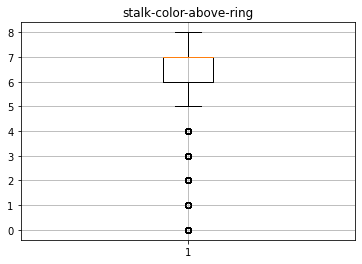

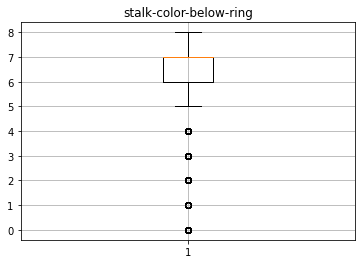

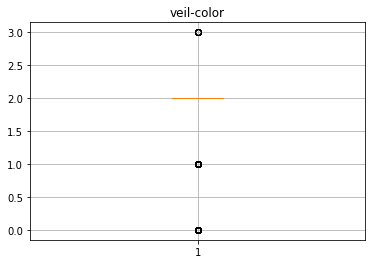

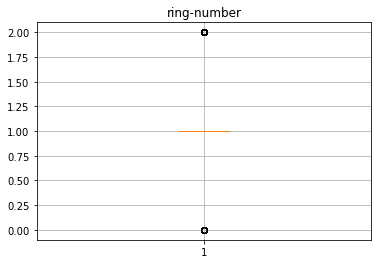

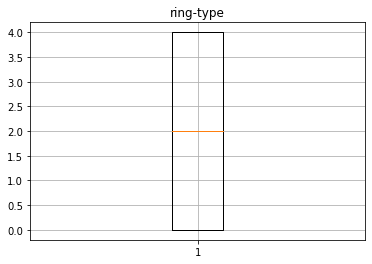

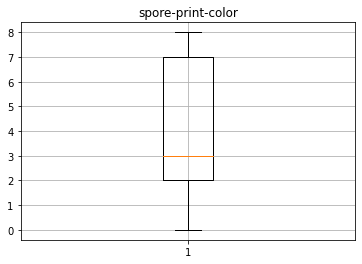

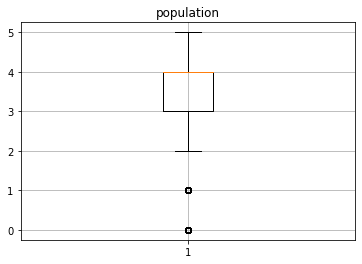

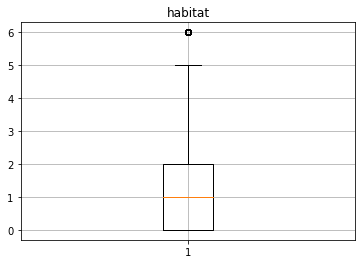

In [29]:
#Checking the outliers
for i in col:
    plt.boxplot(i, data=data)
    plt.title(i)
    plt.grid()
    plt.show()

### From above visual we can say that,
* The circles shown in boxplot represents outliers in dataset. 
* After, analysing each columns they are not really the outliers, since most of the data distribution is not symmetrical hence, presence of less no. of other class data depicted as outliers.

## Model Building

### Building Base Models with default parameters & all 22 features

In [30]:
#Splitting the variables into features & target
X = data.iloc[:, 1:]
y = data[['class']]

In [31]:
#Segregating data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, shuffle=True, stratify=y)

In [32]:
#Building the different classification models with default parameters
lr_mod  = LogisticRegression(random_state=0)
dt_mod  = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=None)
rf_mod  = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=0)
knn_mod = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
svm_mod = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=0)
xgb_mod = XGBClassifier(random_state=0, n_estimators=100)

## Model Training & Evaluation

In [33]:
%%time
lr_mod.fit(X_train, y_train)
dt_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
knn_mod.fit(X_train, y_train)
svm_mod.fit(X_train, y_train)
xgb_mod.fit(X_train, y_train)

CPU times: total: 2.64 s
Wall time: 848 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Model Testing & Evaluation

In [34]:
%%time
y_pred_lr  = lr_mod.predict(X_test)
y_pred_dt  = dt_mod.predict(X_test)
y_pred_rf  = rf_mod.predict(X_test)
y_pred_knn = knn_mod.predict(X_test)
y_pred_svm = svm_mod.predict(X_test)
y_pred_xgb = xgb_mod.predict(X_test)

CPU times: total: 1.73 s
Wall time: 589 ms


### Analysing the model performance & accuracy

In [35]:
#Testing the accuracy for all models
cc  = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_knn, y_pred_svm, y_pred_xgb]
mod = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbours', 'Support Vector Machine', 'Extreme Gradient Boosting']

print('Accuracy Scores for all models','\n')

for i,j in zip(cc, mod):
    print('==========================')
    print(j, ':', accuracy_score(y_test, i).round(2))
    print('==========================', '\n')

Accuracy Scores for all models 

Logistic Regression : 0.96

Decision Tree : 1.0

Random Forest : 1.0

K-Nearest Neighbours : 1.0

Support Vector Machine : 0.99

Extreme Gradient Boosting : 1.0



Confusion Matrix for all models


Logistic Regression


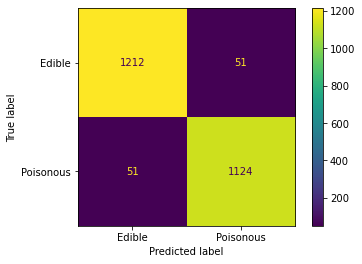



Decision Tree


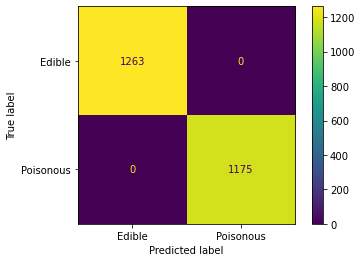



Random Forest


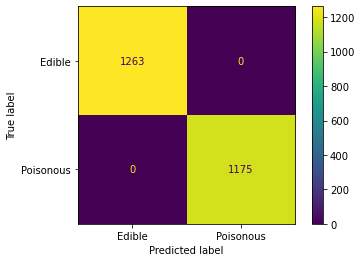



K-Nearest Neighbours


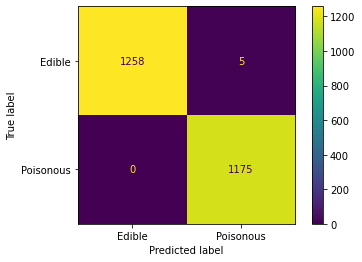



Support Vector Machine


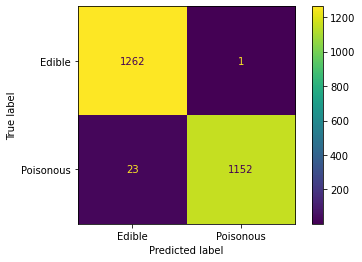



Extreme Gradient Boosting


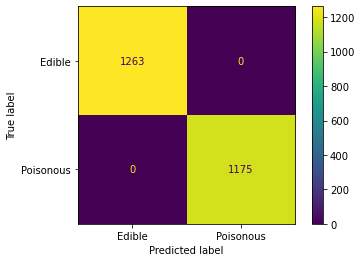

In [36]:
#Plotting Confusion Matrix for all models
dd  = [lr_mod, dt_mod, rf_mod, knn_mod, svm_mod, xgb_mod]
mod = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbours', 'Support Vector Machine', 'Extreme Gradient Boosting']

print('Confusion Matrix for all models')

for i,j in zip(dd, mod):
    print('\n','========================================', '\n')
    print(j)
    plot_confusion_matrix(i, X_test, y_test, display_labels= ['Edible', 'Poisonous'])   
    plt.show()

In [37]:
#Classification Report for all models
cc  = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_knn, y_pred_svm, y_pred_xgb]
mod = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbours', 'Support Vector Machine', 'Extreme Gradient Boosting']

print('Classification Report for all models','\n')

for i,j in zip(cc, mod):
    print('========================================================')
    print(j,'\n\n' , classification_report(y_test, i))
    print('========================================================', '\n')

Classification Report for all models 

Logistic Regression 

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1263
           1       0.96      0.96      0.96      1175

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438


Decision Tree 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Random Forest 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1

### From above model evaluation,
* Accuracy score for all models except Logistic Regression was comparatively low.
* As per confusion matrix, our goal is minimise the False Negatives. Hence, except Logistic Regression & Support Vector Machine all models have successfully reduced False Negatives to zero.
* As per classification report, we would try to maximise recall class 1. Except, Logistic & SVM models, all model's recall value for class 1 is 100%.

### We build above models with all features taken into consideration to predict whether mushroom is edible or not. Let's try building models considering only significant features to predict the class of mushroom. 

## Feature Engineering
* Correlation Analysis
* Chi2 feature selection method
* RFE feature selection method
* Decision Tree Feature Importance

### Correlation Analysis

In [38]:
#Correlation Analysis in tabular form
data.corr().round(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,...,-0.33,-0.30,-0.15,-0.15,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,...,-0.03,-0.03,-0.03,-0.03,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,...,0.09,0.11,0.07,0.07,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,...,-0.06,-0.05,0.00,0.01,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,...,0.46,0.46,0.08,0.09,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,...,0.12,0.06,0.17,0.17,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,...,-0.09,-0.12,0.10,0.10,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,...,-0.21,-0.21,0.27,0.25,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,...,0.06,0.01,0.30,0.28,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,...,0.22,0.26,-0.06,-0.07,-0.10,0.10,0.63,-0.42,-0.03,-0.20


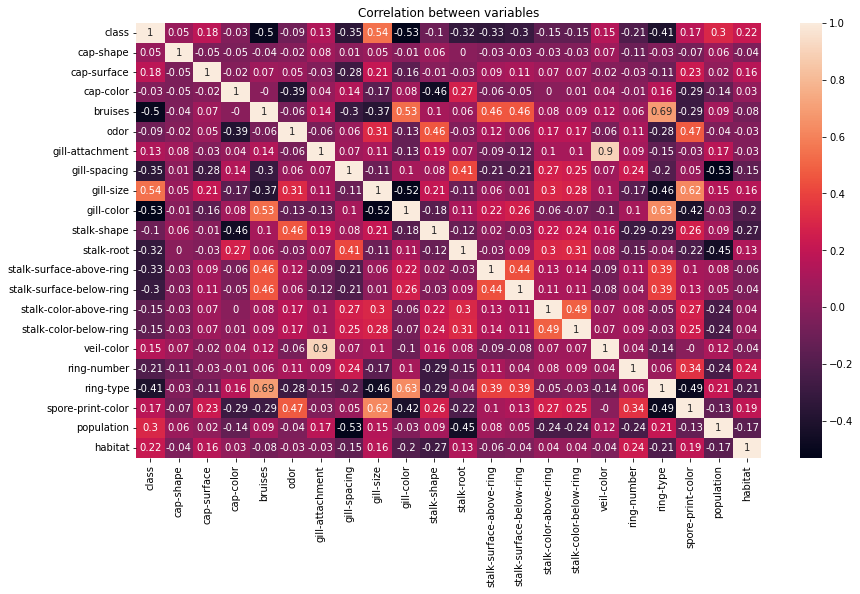

In [39]:
##Correlation Analysis in visual form
plt.figure(figsize=(14,8))
sns.heatmap(data.corr().round(2), annot=True)
plt.title('Correlation between variables')
plt.show()

In [40]:
#Analysis of correlation between target & feature variables 
data.corr()['class'].sort_values().round(2)

gill-color                 -0.53
bruises                    -0.50
ring-type                  -0.41
gill-spacing               -0.35
stalk-surface-above-ring   -0.33
stalk-root                 -0.32
stalk-surface-below-ring   -0.30
ring-number                -0.21
stalk-color-above-ring     -0.15
stalk-color-below-ring     -0.15
stalk-shape                -0.10
odor                       -0.09
cap-color                  -0.03
cap-shape                   0.05
gill-attachment             0.13
veil-color                  0.15
spore-print-color           0.17
cap-surface                 0.18
habitat                     0.22
population                  0.30
gill-size                   0.54
class                       1.00
Name: class, dtype: float64

### From correlation analysis,
* Stalk-shape, Odour, Cap-color & Cap-shape are having low correlation w.r.t class.
* Gill-colour, gill-size & bruises have high correlation w.r.t class.

### Chi2 feature selection method

In [41]:
chsq_fi = chi2(X, y)

In [42]:
#Results of chi2 statistics
chsq_fi

(array([1.75083640e+01, 2.14068544e+02, 1.15113816e+01, 1.19427735e+03,
        7.59101632e+01, 3.50544682e+00, 8.26795274e+02, 1.63660683e+03,
        5.95776447e+03, 3.65941055e+01, 1.35835864e+03, 2.22982400e+02,
        2.06648180e+02, 1.19792216e+02, 1.09789410e+02, 5.12682568e+00,
        2.56463352e+01, 1.95061015e+03, 3.79132729e+02, 3.11766736e+02,
        7.51309489e+02]),
 array([2.86046529e-005, 1.77936190e-048, 6.91713451e-004, 1.06903680e-261,
        2.96868171e-018, 6.11673438e-002, 8.06129280e-182, 0.00000000e+000,
        0.00000000e+000, 1.45470942e-009, 2.35116618e-297, 2.02239248e-050,
        7.39886855e-047, 7.02463813e-028, 1.08973983e-025, 2.35587753e-002,
        4.10073541e-007, 0.00000000e+000, 1.92211948e-084, 9.00236554e-070,
        2.08291637e-165]))

In [43]:
# printing p-values for each categorical features
p_value = pd.Series(chsq_fi[1], index = data.columns[1:])
p_value.sort_values(ascending = True, inplace = True)
p_value.round(5)

ring-type                   0.00000
gill-color                  0.00000
gill-size                   0.00000
stalk-root                  0.00000
bruises                     0.00000
gill-spacing                0.00000
habitat                     0.00000
spore-print-color           0.00000
population                  0.00000
stalk-surface-above-ring    0.00000
cap-surface                 0.00000
stalk-surface-below-ring    0.00000
stalk-color-above-ring      0.00000
stalk-color-below-ring      0.00000
odor                        0.00000
stalk-shape                 0.00000
ring-number                 0.00000
cap-shape                   0.00003
cap-color                   0.00069
veil-color                  0.02356
gill-attachment             0.06117
dtype: float64

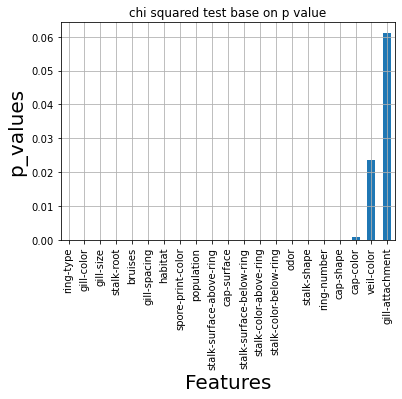

In [44]:
#Visualising the p-values
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.grid()
plt.show()

### From above visual,
* Only gill-attachment is having p-value greater than 0.05. Assuming, the threshold alpha is 0.05.
* As per chi2 method, gill-attachment is not an important feature for model building.

### RFE (Recursive Feature Elimination)

In [45]:
#Drawing Important features from Decision Tree model using RFE 
rfe_dt  = RFE(dt_mod, n_features_to_select=None)

In [46]:
rfe_dt.fit(X,y)

RFE(estimator=DecisionTreeClassifier(random_state=0))

In [47]:
#Important features as per decision tree model
rfe_dt.get_feature_names_out()

array(['bruises', 'odor', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-root', 'ring-number', 'spore-print-color', 'population',
       'habitat'], dtype=object)

In [48]:
#Drawing Important features from Random Forest model using RFE
rfe_rf  = RFE(rf_mod, n_features_to_select=None)

In [49]:
rfe_rf.fit(X,y)

RFE(estimator=RandomForestClassifier(random_state=0))

In [50]:
#Important features as per random forest model
rfe_rf.get_feature_names_out()

array(['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'ring-type',
       'spore-print-color', 'population'], dtype=object)

In [51]:
#Drawing Important features from Extreme Gradient Boosting model using RFE
rfe_xgb = RFE(xgb_mod, n_features_to_select=None)

In [52]:
rfe_xgb.fit(X,y)

RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=1, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None, gamma=0,
                            gpu_id=-1, grow_policy='depthwise',
                            importance_type=None, interaction_constraints='',
                            learning_rate=0.300000012, max_bin=256,
                            max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                            max_leaves=0, min_child_weight=1, missing=nan,
                            monotone_constraints='()', n_estimators=100,
                            n_jobs=0, num_parallel_tree=1, predictor='auto',
                            random_state=0, reg_alpha=0, reg_lambda=1, ...))

In [53]:
#Important features as per extreme gradient boost model
rfe_xgb.get_feature_names_out()

array(['bruises', 'odor', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-root', 'stalk-color-above-ring', 'spore-print-color',
       'population', 'habitat'], dtype=object)

In [54]:
#Comparing all the features from 3 models in a DataFrame
rfe_df = pd.DataFrame({'Decision Tree' : rfe_dt.get_feature_names_out(),
                       'Random Forest' : rfe_rf.get_feature_names_out(),
                       'Extreme Gradient Boost' : rfe_xgb.get_feature_names_out()})
rfe_df

,Decision Tree,Random Forest,Extreme Gradient Boost
0,bruises,bruises,bruises
1,odor,odor,odor
2,gill-size,gill-spacing,gill-size
3,gill-color,gill-size,gill-color
4,stalk-shape,gill-color,stalk-shape
5,stalk-root,stalk-root,stalk-root
6,ring-number,stalk-surface-above-ring,stalk-color-above-ring
7,spore-print-color,ring-type,spore-print-color
8,population,spore-print-color,population
9,habitat,population,habitat


### From above RFE method for 3 models,
* The important features common in all three models are found to be bruises, odour, gill-size, gill-colour, stalk-root, spore-print-colour, population. Seven significant features are common in all three models. 

### Decision-Tree Feature Importance

In [55]:
dt_mod.feature_importances_

array([0.        , 0.        , 0.        , 0.02875726, 0.03563624,
       0.        , 0.        , 0.12357014, 0.32758897, 0.02423943,
       0.01242363, 0.00331718, 0.0025711 , 0.        , 0.        ,
       0.        , 0.01901739, 0.00443504, 0.21366741, 0.17848162,
       0.02629458])

In [56]:
dt_mod.feature_names_in_

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'], dtype=object)

In [57]:
if_dt = pd.DataFrame({'Decision Tree Feat_IMP': dt_mod.feature_names_in_,
                      'Values' : dt_mod.feature_importances_})
if_dt.sort_values('Values', ascending=False, ignore_index=True)

,Decision Tree Feat_IMP,Values
0,gill-color,0.327589
1,spore-print-color,0.213667
2,population,0.178482
3,gill-size,0.123570
4,odor,0.035636
5,bruises,0.028757
6,habitat,0.026295
7,stalk-shape,0.024239
8,ring-number,0.019017
9,stalk-root,0.012424


### From decision tree feature importance,
* We can observe that Gill-colour, spore-print-colour, population & gill-size are found to be important features. 

### From above Feature Engineering techniques,
* We can include 10 features, 7 significant features from RFE, decision tree importance and correlational analysis & 3 researched important features.
* As per researchers, cap-colour, stalk-surface-above-ring, habitat are also significant features to distinguish among edible or poisonous class.
* Features viz bruises, gill-size, gill-colour, habitat, spore-print-colour, population, cap-colour, stalk-root, odour, stalk-surface-above-ring. 
* Let's try building model based on above 10 features & analyse the model performance & accuracy.

### Building Model based on 10 significant features

In [58]:
#Selecting only 10 significant features for training
X_train_fi = X_train.loc[:, ['bruises', 'gill-size', 'gill-color', 'habitat', 'spore-print-color', 'population', 'cap-color', 'stalk-root', 'odor', 'stalk-surface-above-ring']]

In [59]:
#Selecting only 10 significant features for tetsing
X_test_fi = X_test.loc[:, ['bruises', 'gill-size', 'gill-color', 'habitat', 'spore-print-color', 'population', 'cap-color', 'stalk-root', 'odor', 'stalk-surface-above-ring']]

In [60]:
#Size of train & test data
X_train_fi.shape, X_test_fi.shape

((5686, 10), (2438, 10))

In [61]:
#Building models with default parameters
lr_mod2  = LogisticRegression(random_state=0)
knn_mod2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
svm_mod2 = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=0)
dt_mod2  = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=None)
rf_mod2  = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=0)
xgb_mod2 = XGBClassifier(random_state=0, n_estimators=100)

## Model Training & Evaluation

In [62]:
%%time
lr_mod2.fit(X_train_fi, y_train)
knn_mod2.fit(X_train_fi, y_train)
svm_mod2.fit(X_train_fi, y_train)
dt_mod2.fit(X_train_fi, y_train)
rf_mod2.fit(X_train_fi, y_train)
xgb_mod2.fit(X_train_fi, y_train)

CPU times: total: 2.12 s
Wall time: 743 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Model Testing & Evaluation

In [63]:
%%time
y_pred_lr  = lr_mod2.predict(X_test_fi)
y_pred_knn = knn_mod2.predict(X_test_fi)
y_pred_svm = svm_mod2.predict(X_test_fi)
y_pred_dt  = dt_mod2.predict(X_test_fi)
y_pred_rf  = rf_mod2.predict(X_test_fi)
y_pred_xgb = xgb_mod2.predict(X_test_fi)

CPU times: total: 1.14 s
Wall time: 289 ms


In [64]:
#Ensuring only the significant 10 features are trained & tested for decision tree model 
dt_mod2.feature_names_in_

array(['bruises', 'gill-size', 'gill-color', 'habitat',
       'spore-print-color', 'population', 'cap-color', 'stalk-root',
       'odor', 'stalk-surface-above-ring'], dtype=object)

In [65]:
#Ensuring only the significant 10 features are trained & tested for random forest model 
rf_mod2.feature_names_in_

array(['bruises', 'gill-size', 'gill-color', 'habitat',
       'spore-print-color', 'population', 'cap-color', 'stalk-root',
       'odor', 'stalk-surface-above-ring'], dtype=object)

In [66]:
#Ensuring only the significant 10 features are trained & tested for extreme gradient boost model 
xgb_mod2.feature_names_in_

array(['bruises', 'gill-size', 'gill-color', 'habitat',
       'spore-print-color', 'population', 'cap-color', 'stalk-root',
       'odor', 'stalk-surface-above-ring'], dtype='<U24')

### Analysing the model performance & accuracy

In [67]:
#Testing the accuracy for all models
cc  = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_knn, y_pred_svm, y_pred_xgb]
mod = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbours', 'Support Vector Machine', 'Extreme Gradient Boosting']

print('Accuracy Scores for all models','\n')

for i,j in zip(cc, mod):
    print('==========================')
    print(j, ':', accuracy_score(y_test, i).round(2))
    print('==========================', '\n')

Accuracy Scores for all models 

Logistic Regression : 0.92

Decision Tree : 1.0

Random Forest : 1.0

K-Nearest Neighbours : 1.0

Support Vector Machine : 0.99

Extreme Gradient Boosting : 1.0



Confusion Matrix for all models


Logistic Regression


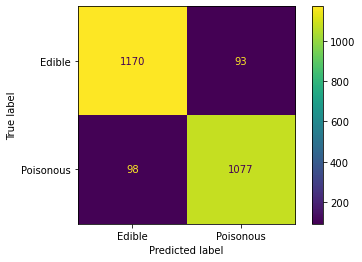



Decision Tree


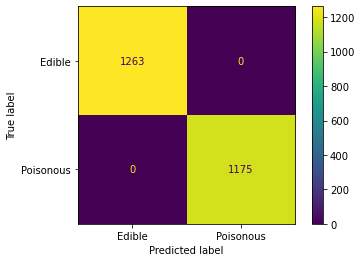



Random Forest


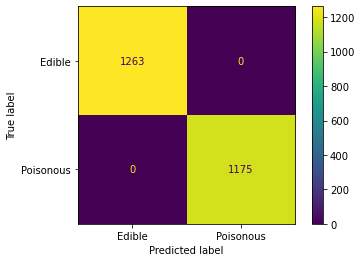



K-Nearest Neighbours


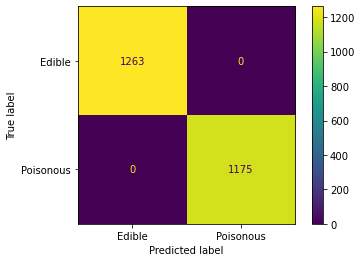



Support Vector Machine


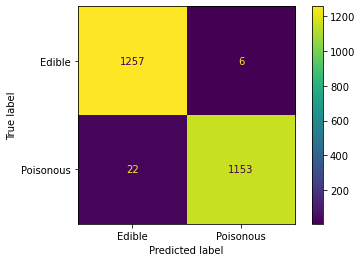



Extreme Gradient Boosting


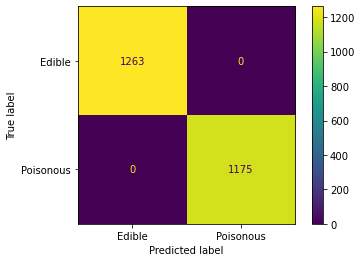

In [68]:
#Plotting Confusion Matrix for all models
dd  = [lr_mod2, dt_mod2, rf_mod2, knn_mod2, svm_mod2, xgb_mod2]
mod = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbours', 'Support Vector Machine', 'Extreme Gradient Boosting']
print('Confusion Matrix for all models')

for i,j in zip(dd, mod):
    print('\n','========================================', '\n')
    print(j)
    plot_confusion_matrix(i, X_test_fi, y_test, display_labels= ['Edible', 'Poisonous'])   
    plt.show()

In [69]:
#Classification Report for all models
cc  = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_knn, y_pred_svm, y_pred_xgb]
mod = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbours', 'Support Vector Machine', 'Extreme Gradient Boosting']


print('Classification Report for all models','\n')

for i,j in zip(cc, mod):
    print('========================================================')
    print(j,'\n\n' , classification_report(y_test, i))
    print('========================================================', '\n')

Classification Report for all models 

Logistic Regression 

               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1263
           1       0.92      0.92      0.92      1175

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Decision Tree 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Random Forest 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1

### From above model evaluation,
* Accuracy score for decision tree, random forest, extreme gradient boost & KNN models hit 100%.
* As per confusion matrix, our goal is minimise the False Negatives. Decision tree, Random Forest Extreme Gradient Boost & KNN models models have successfully reduced False Negatives to zero.
* As per classification report, we would try to maximise recall class 1. All model's recall value for class 1 is 100% except Logistic Regression & Support Vector Machine.  

## Finalising the Classifier model

In [70]:
kf = KFold(n_splits=15, shuffle=True, random_state=0)

In [71]:
cross_val_score(dt_mod2, X, y, cv=kf, scoring='accuracy').mean()

1.0

In [72]:
cross_val_score(rf_mod2, X, y, cv=kf, scoring='accuracy').mean()

1.0

In [73]:
cross_val_score(xgb_mod2, X, y, cv=kf, scoring='accuracy').mean()

1.0

### Conclusion:
* After comparing the performance & accuracy for 2 models (1st model with all features vs 2nd model with 10 significant features), by training model with only 10 significant features it was able to hit accuracy of 100% with 0 False Negatives. 


* Hence, we can go ahead and finalise our Random Forest model 2 with 10 significant features, since dataset is not complex and overall stability and performance of model is good.

## Building Pipeline 

In [74]:
#Selecting the significant features
X_train_fi.columns

Index(['bruises', 'gill-size', 'gill-color', 'habitat', 'spore-print-color',
       'population', 'cap-color', 'stalk-root', 'odor',
       'stalk-surface-above-ring'],
      dtype='object')

In [75]:
#Using the mapper to perform specific transformer to the features
m = DataFrameMapper([(['bruises', LabelEncoder()]), (['gill-size', LabelEncoder()]), (['gill-color', LabelEncoder()]),
                     (['habitat', LabelEncoder()]), (['spore-print-color', LabelEncoder()]), (['population', LabelEncoder()]),
                     (['cap-color', LabelEncoder()]), (['stalk-root', LabelEncoder()]), (['odor', LabelEncoder()]),
                     (['stalk-surface-above-ring', LabelEncoder()])])

In [76]:
#Making the pipeline stepwise
model = Pipeline(steps=[('mapper', m), ('mod', rf_mod2)])
model

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['bruises', LabelEncoder()],
                                           ['gill-size', LabelEncoder()],
                                           ['gill-color', LabelEncoder()],
                                           ['habitat', LabelEncoder()],
                                           ['spore-print-color',
                                            LabelEncoder()],
                                           ['population', LabelEncoder()],
                                           ['cap-color', LabelEncoder()],
                                           ['stalk-root', LabelEncoder()],
                                           ['odor', LabelEncoder()],
                                           ['stalk-surface-above-ring',
                                            LabelEncoder()]])),
                ('mod', RandomForestClassifier(random_state=0))])

## User Testing

In [77]:
#Considering the original data
uid = msh_data.loc[:, ['bruises', 'gill-size', 'gill-color', 'habitat', 'spore-print-color',
       'population', 'cap-color', 'stalk-root', 'odor',
       'stalk-surface-above-ring', 'class']]

In [92]:
#Picking up 10 random samples from our original data
ref = uid.sample(n=10, random_state=1)
ref

,bruises,gill-size,gill-color,habitat,spore-print-color,population,cap-color,stalk-root,odor,stalk-surface-above-ring,class
1392,f,b,h,g,k,a,w,e,n,f,e
4051,f,n,u,d,n,v,p,b,c,s,p
3725,f,n,g,d,n,v,w,b,c,s,p
7177,f,n,b,l,w,v,n,b,f,k,p
103,t,b,n,p,k,y,y,r,a,s,e
3371,f,n,g,d,n,v,p,b,c,s,p
6738,f,n,b,l,w,v,n,b,y,k,p
1525,f,b,n,g,n,s,n,e,n,f,e
5838,t,b,p,u,h,s,g,b,f,f,p
4299,f,b,g,g,h,y,y,b,f,k,p


In [79]:
#Splititing the collected samples for testing 
uid_Xtest = ref.iloc[:, :-1]
uid_ytest = ref[['class']]

In [80]:
data2 = uid.copy()
data2.shape

(8124, 11)

In [81]:
#Dropping the collected samples from original dataset so that model is not trained on it
data2.drop(index=[1392, 4051, 3725, 7177, 103, 3371, 6738, 1525, 5838, 4299], inplace=True)

In [82]:
#Reset the index after dropping the samples
data2.reset_index(drop='index', inplace=True)

In [83]:
data2

,bruises,gill-size,gill-color,habitat,spore-print-color,population,cap-color,stalk-root,odor,stalk-surface-above-ring,class
0,t,n,k,u,k,s,n,e,p,s,p
1,t,b,k,g,n,n,y,c,a,s,e
2,t,b,n,m,n,n,w,c,l,s,e
3,t,n,n,u,k,s,w,e,p,s,p
4,f,b,k,g,n,a,g,e,n,s,e
...,...,...,...,...,...,...,...,...,...,...,...
8109,f,b,y,l,b,c,n,b,n,s,e
8110,f,b,y,l,b,v,n,b,n,s,e
8111,f,b,n,l,b,c,n,b,n,s,e
8112,f,n,b,l,w,v,n,b,y,s,p


In [84]:
#Splitting the original data for training the model
X_t = data2.iloc[:, :-1]
y_t = data2[['class']]

In [85]:
X_t

,bruises,gill-size,gill-color,habitat,spore-print-color,population,cap-color,stalk-root,odor,stalk-surface-above-ring
0,t,n,k,u,k,s,n,e,p,s
1,t,b,k,g,n,n,y,c,a,s
2,t,b,n,m,n,n,w,c,l,s
3,t,n,n,u,k,s,w,e,p,s
4,f,b,k,g,n,a,g,e,n,s
...,...,...,...,...,...,...,...,...,...,...
8109,f,b,y,l,b,c,n,b,n,s
8110,f,b,y,l,b,v,n,b,n,s
8111,f,b,n,l,b,c,n,b,n,s
8112,f,n,b,l,w,v,n,b,y,s


In [86]:
y_t

,class
0,p
1,e
2,e
3,p
4,e
...,...
8109,e
8110,e
8111,e
8112,p


In [87]:
#Training the model
model.fit(X_t, y_t)

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['bruises', LabelEncoder()],
                                           ['gill-size', LabelEncoder()],
                                           ['gill-color', LabelEncoder()],
                                           ['habitat', LabelEncoder()],
                                           ['spore-print-color',
                                            LabelEncoder()],
                                           ['population', LabelEncoder()],
                                           ['cap-color', LabelEncoder()],
                                           ['stalk-root', LabelEncoder()],
                                           ['odor', LabelEncoder()],
                                           ['stalk-surface-above-ring',
                                            LabelEncoder()]])),
                ('mod', RandomForestClassifier(random_state=0))])

In [88]:
#Model Testing & Evaluation

print('Actual data:', '   ',uid_ytest.values.flatten(), '\n')

print('Predicted data: ', model.predict(uid_Xtest))

Actual data:     ['e' 'p' 'p' 'p' 'e' 'p' 'p' 'e' 'p' 'p'] 

Predicted data:  ['e' 'p' 'p' 'p' 'e' 'p' 'p' 'e' 'p' 'p']


## Saving the model 

In [89]:
#Saving the model to file
dump(model, open('Mushroom_intelligence.pkl', 'wb'))

In [90]:
#Loading the file
ml = load(open('Mushroom_intelligence.pkl', 'rb'))

In [91]:
#Running the file for testing & evaluating 
print('Predicted Values:', ml.predict(uid_Xtest))

Predicted Values: ['e' 'p' 'p' 'p' 'e' 'p' 'p' 'e' 'p' 'p']


### Final Note:
* Further deployment of the model is made using streamlit for better user-interface testing.

#                                     Thank you!! 

# ================================================